##**IMPORT IMPORTANT LIBRARIRES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **LOAD** **DATASET**

In [ ]:
df=pd.read_csv('diabetes_prediction_dataset.csv')

##**DISPLAY** **THE** **DATA**

In [ ]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


##**DATASET OVERVIEW AND STRUCTURE**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


##**CHECKING THE SHAPE OF DATA (ROWS,COLUMNS)**

In [ ]:
df.shape

(100000, 9)

##**CHECKING** **NULL** **VALUES**

In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

##**CHECKING UNIQUE VALUE OF GENDER COLUMN**

In [ ]:
gender_unique=df['gender'].unique()
print(gender_unique)

['Female' 'Male' 'Other']


##**CHECKING UNIQUE VALUE OF SMOKING HISTORY COLUMN**

In [ ]:
smoking_history_unique=df['smoking_history'].unique()
print(smoking_history_unique)

['never' 'No Info' 'current' 'former' 'ever' 'not current']


##**APPLYING LABELENCODER FOR CATEGORICAL VARIABLE ENCODING**

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
df['gender'] = label_encoder.fit_transform(df['gender'])
print(df['gender'])

0        0
1        0
2        1
3        0
4        1
        ..
99995    0
99996    0
99997    1
99998    0
99999    0
Name: gender, Length: 100000, dtype: int64


In [ ]:
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])
print(df['smoking_history'])

0        4
1        0
2        4
3        1
4        1
        ..
99995    0
99996    0
99997    3
99998    4
99999    1
Name: smoking_history, Length: 100000, dtype: int64


##**DATA INSPECTION AND OVERVIEW**

In [ ]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


##**CORRELATION MATRIX OF DATASET**

In [ ]:
df.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.030656,0.014203,0.077696,-0.077919,-0.022994,0.019957,0.017199,0.037411
age,-0.030656,1.000000,0.251171,0.233354,0.228608,0.337396,0.101354,0.110672,0.258008
hypertension,0.014203,0.251171,1.000000,0.121262,0.093177,0.147666,0.080939,0.084429,0.197823
heart_disease,0.077696,0.233354,0.121262,1.000000,0.027598,0.061198,0.067589,0.070066,0.171727
smoking_history,-0.077919,0.228608,0.093177,0.027598,1.000000,0.179361,0.037369,0.040219,0.094290
bmi,-0.022994,0.337396,0.147666,0.061198,0.179361,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.019957,0.101354,0.080939,0.067589,0.037369,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.017199,0.110672,0.084429,0.070066,0.040219,0.091261,0.166733,1.000000,0.419558
diabetes,0.037411,0.258008,0.197823,0.171727,0.094290,0.214357,0.400660,0.419558,1.000000


##**HEATMAP OF CORRELATION MATRIX**

<Axes: >

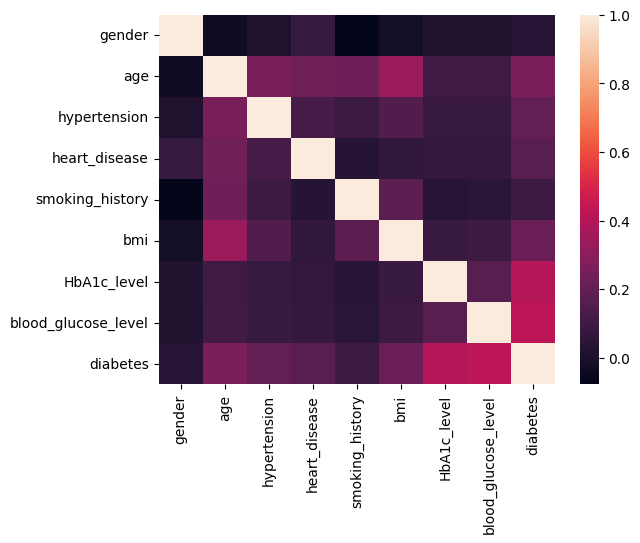

In [ ]:
sns.heatmap(df.corr())

##**CHECKING ALL THE DATATYPES**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 6.9 MB


##**MAKING DEPENDENT AND INDEPENDENT VARIABLES**

In [ ]:
x=df.iloc[:,:-1] #independent variable
y=df.iloc[:,-1] #dependent variable

In [ ]:
x

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90
99996,0,2.0,0,0,0,17.37,6.5,100
99997,1,66.0,0,0,3,27.83,5.7,155
99998,0,24.0,0,0,4,35.42,4.0,100


In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

##**SPLITING DATA INTO TRAINING AND TESTING SETS**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
75220,1,73.0,0,0,3,24.77,3.5,80
48955,1,80.0,0,0,4,24.60,5.7,145
44966,0,38.0,0,0,2,24.33,4.0,158
13568,0,26.0,0,0,5,18.87,5.0,100
92727,0,61.0,1,0,1,22.11,4.5,85
...,...,...,...,...,...,...,...,...
6265,1,49.0,0,0,4,32.98,5.7,80
54886,0,15.0,0,0,4,28.10,5.0,159
76820,1,42.0,0,0,4,26.14,5.8,85
860,0,37.0,0,0,4,24.96,6.2,158


In [ ]:
x_test

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
75721,0,13.0,0,0,0,20.82,5.8,126
80184,0,3.0,0,0,0,21.00,5.0,145
19864,1,63.0,0,0,3,25.32,3.5,200
76699,0,2.0,0,0,4,17.43,6.1,126
92991,0,33.0,0,0,5,40.08,6.2,200
...,...,...,...,...,...,...,...,...
32595,0,44.0,0,0,5,21.95,6.0,159
29313,1,61.0,1,0,3,41.98,3.5,90
37862,0,49.0,0,0,4,26.51,4.8,100
53421,1,73.0,0,1,0,27.32,6.6,100


In [ ]:
y_test

75721    0
80184    0
19864    0
76699    0
92991    1
        ..
32595    0
29313    0
37862    0
53421    0
42410    0
Name: diabetes, Length: 20000, dtype: int64

In [ ]:
y_train

75220    0
48955    1
44966    0
13568    0
92727    0
        ..
6265     0
54886    0
76820    0
860      0
15795    0
Name: diabetes, Length: 80000, dtype: int64

##**FITTING STANDARD SCALER MODEL SELECTION**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

##**CREATING LOGISTIC REGRESSION MODEL**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)


##**TRAINING LOGISTIC REGRESSION MODEL**

In [ ]:
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

## **MAKING PREDICTION LOGISTIC REGRESSION MODEL**

In [ ]:
y_pred=classifier.predict(x_test)

##**APPLYING CONFUSION MATRIX MODEL FITTING**

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
cm

array([[18127,   165],
       [  661,  1047]])

##**CLASSIFICATION MODEL ACCURACY SCORE**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9587

##**CREATING SUPPORT VECTOR CLASSIFIER (SVC)**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
classifier = SVC(kernel='linear', random_state=0)


##**TRAINING SUPPORT VECTOR CLASSIFIER (SVC)**

In [ ]:
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

##**MAKING PREDICTIONS OF SVC**

In [ ]:
y_pred= classifier.predict(x_test)

##**APPLYING CONFUSION MATRICS IN SVC**

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[18211,    81],
       [  729,   979]])

##**CLASSIFYING SVC ACCURACY SCORE**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9595


##**CREATING KNEIGHBOURS CLASSIFIER (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )

##**TRAINING KNEIGHBOURS CLASSIFIER (KNN)**

In [ ]:
classifier.fit(x_train, y_train)


KNeighborsClassifier()

##**MAKING PREDICTIONS IN KNN**

In [ ]:
y_pred= classifier.predict(x_test)

##**APPLYING CONFUSION MATRIX IN KNN**

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[18163,   129],
       [  646,  1062]])

## **CLASSIFYING KNN ACCURACY SCORE**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.96125


##**COMPARISON BETWEEN LOGISTIC,SVC AND KNN**

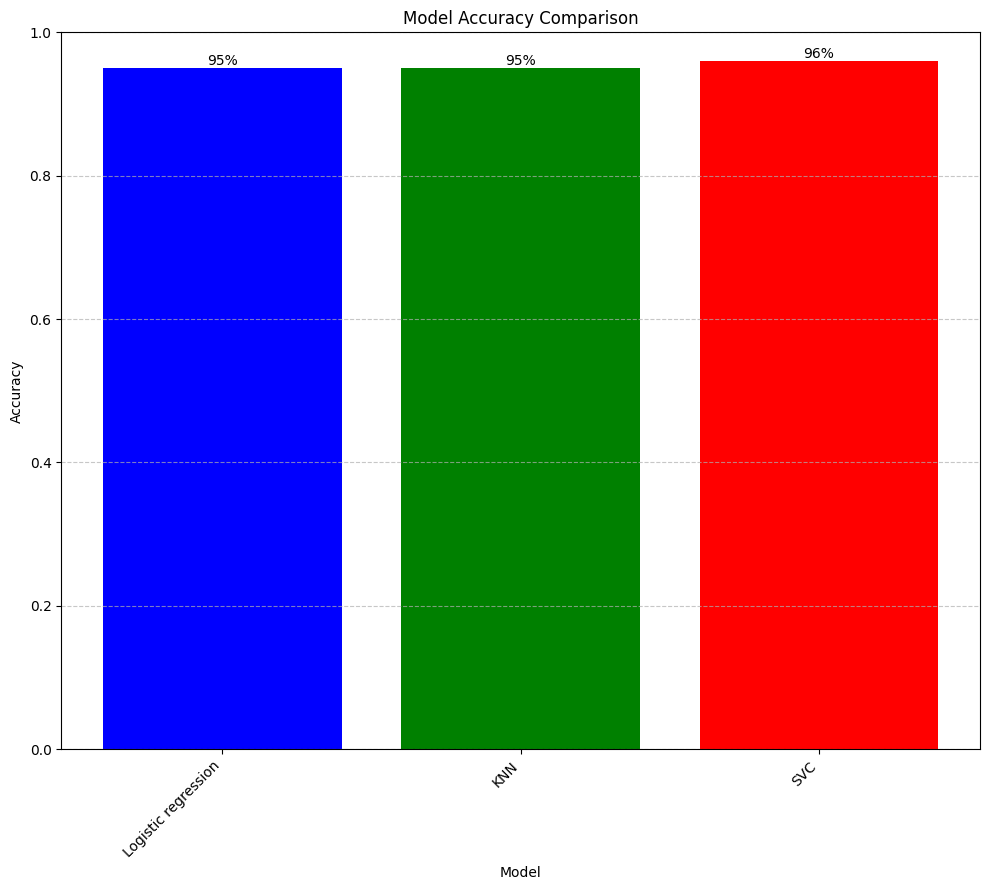

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample accuracy data
accuracy_data = {
    'Model': ['Logistic regression', 'KNN','SVC'],
    'Accuracy': [0.95, 0.95 , 0.96,]  # Sample accuracy scores
}

# Create DataFrame
accuracy_df = pd.DataFrame(accuracy_data)

# Define colors for each bar
colors = ['blue', 'green', 'red',]

# Plotting
plt.figure(figsize=(10, 9))
bars = plt.bar(accuracy_df['Model'], accuracy_df['Accuracy'], color=colors)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Add values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height*100:.0f}%',  # Convert to percentage and format
        ha='center',
        va='bottom'
    )

plt.show()
